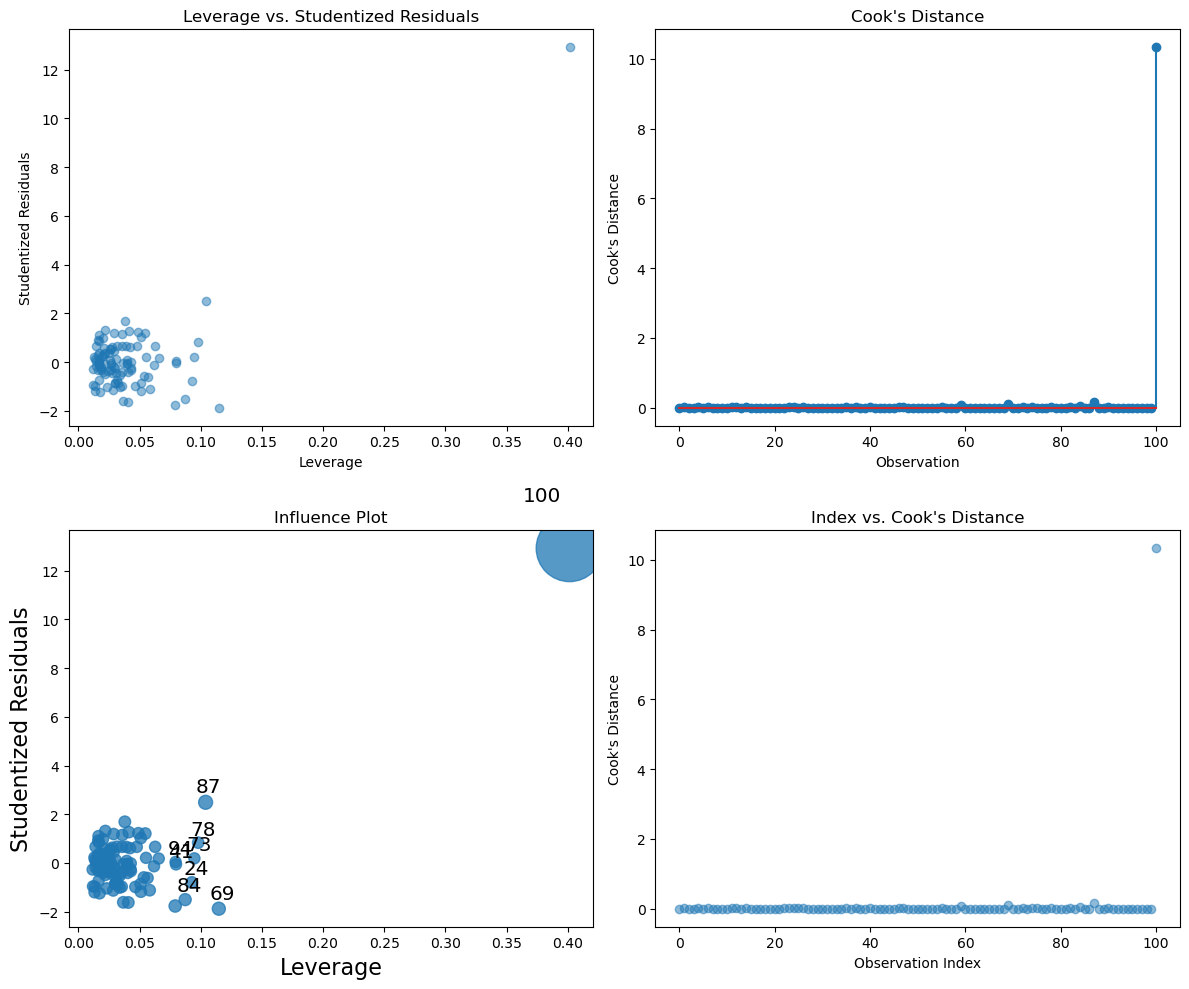

Influential observations based on Cook's distance:
           X1        X2        X3          y
59   1.453534 -0.264657  2.720169   5.669240
69   0.513786  0.515048  3.852731   4.694276
84   2.122156  1.032465 -1.519370   7.637216
87  -0.059525 -3.241267 -1.024388   0.199671
100  4.000000  4.000000  4.000000  50.000000


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot

# Sample data
np.random.seed(42)
X = np.random.normal(0, 1, size=(100, 3))
y = 2 + 3*X[:, 0] + 1.5*X[:, 1] + 0.5*X[:, 2] + np.random.normal(0, 2, size=100)

# Add an influential point
X = np.vstack([X, [4, 4, 4]])
y = np.append(y, 50)

# Create DataFrame
df = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
df['y'] = y

# Fit model
X_with_const = sm.add_constant(df[['X1', 'X2', 'X3']])
model = sm.OLS(df['y'], X_with_const).fit()

# Get influence measures
influence = model.get_influence()
leverage = influence.hat_matrix_diag
resid = model.resid
student_resid = influence.resid_studentized_external
cooks_d = influence.cooks_distance[0]

# Plot influence measures
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Leverage vs. Studentized Residuals
axes[0, 0].scatter(leverage, student_resid, alpha=0.5)
axes[0, 0].set_xlabel('Leverage')
axes[0, 0].set_ylabel('Studentized Residuals')
axes[0, 0].set_title('Leverage vs. Studentized Residuals')

# Cook's Distance
axes[0, 1].stem(cooks_d)
axes[0, 1].set_xlabel('Observation')
axes[0, 1].set_ylabel("Cook's Distance")
axes[0, 1].set_title("Cook's Distance")

# Influence plot
influence_plot(model, ax=axes[1, 0])
axes[1, 0].set_title('Influence Plot')

# Index vs. Cook's Distance
axes[1, 1].scatter(range(len(cooks_d)), cooks_d, alpha=0.5)
axes[1, 1].set_xlabel('Observation Index')
axes[1, 1].set_ylabel("Cook's Distance")
axes[1, 1].set_title("Index vs. Cook's Distance")

plt.tight_layout()
plt.show()

# Find influential points based on Cook's distance
influential = df.iloc[np.where(cooks_d > 4/len(df))[0]]
print("Influential observations based on Cook's distance:")
print(influential)